In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# https://pymatgen.org/introduction.html
# You have to use the old Materials Project website: https://legacy.materialsproject.org/dashboard
with MPRester("XNPeIZJFSHBQ0Rgi") as m:

    # Band for material id
    band = m.get_bandstructure_by_material_id("mp-984761")

Structure de bandes électroniques du matériau:


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

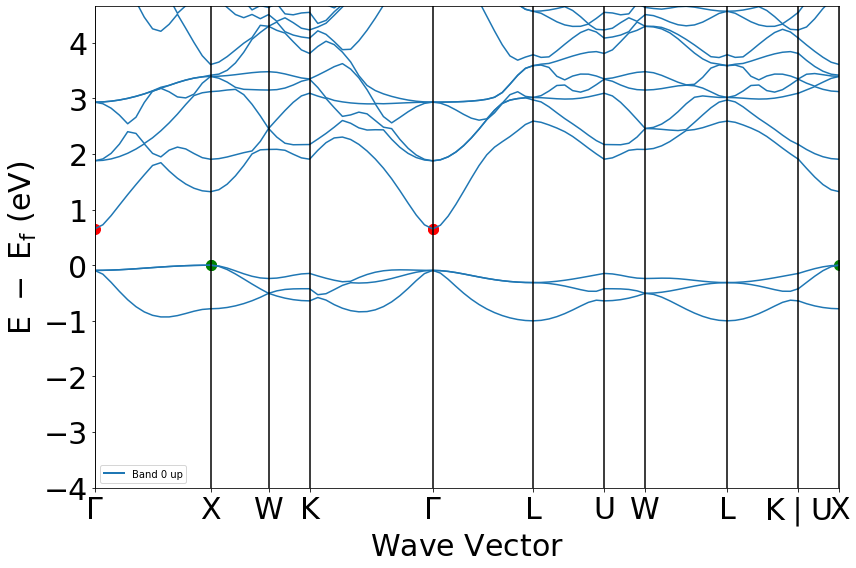

In [2]:
from pymatgen.electronic_structure.plotter import BSPlotter

print('Structure de bandes électroniques du matériau:')
plot = BSPlotter(band)
plot.get_plot(vbm_cbm_marker=True)

<h1>Bande Interdite<h1\>

In [3]:
# Fetching band gap infos
band_gap = band.get_band_gap()

if band_gap['direct']:
    print('La bande interdite est directe')
else:
    print('La bande interdite est indirecte')
    
print('Energie du band gap :', band_gap['energy'], 'eV', '(-> semiconducteur)')
print('Type de transition de bande :', band_gap['transition'])
print('Energie de Fermi :', band.efermi, 'eV')

La bande interdite est indirecte
Energie du band gap : 0.6525000000000001 eV (-> semiconducteur)
Type de transition de bande : X-\Gamma
Energie de Fermi : 1.9688427 eV


<h4>Analyse</h4>

On remarque un band gap de l'ordre d'1 eV. On est donc dans le cas d'un matériau semiconducteur.

La bande interdite est indirecte car les extrémas de la bande de conduction (en rouge) et de la bande de valence (en vert) ne sont pas allignés.

<h1> Dernière bande de valence <h1\>

<h4>Directions de dispersion</h4>

In [4]:
from pymatgen.electronic_structure import plotter
import numpy as np

data = plotter.BSPlotter(band).bs_plot_data()

# We print the distance array
x = data.get('ticks').get('distance')
print('Tableau distance :', x, '\n')

# We remove all duplicates
x = np.unique(x)
print("On ne garde qu'une partie du tableau à cause des dégénérescances", x,"\n")

Tableau distance : [0.0, 0.6934036126972866, 0.6934036126972866, 1.0401054190459296, 1.0401054190459296, 1.2852606173646808, 1.2852606173646808, 2.020726212320933, 2.020726212320933, 2.6212313559926903, 2.6212313559926903, 3.0458526152203915, 3.0458526152203915, 3.2910078135391427, 3.2910078135391427, 3.7813182101766456, 3.7813182101766456, 4.205939469404347, 4.451094667723097] 

On ne garde qu'une partie du tableau à cause des dégénérescances [0.         0.69340361 1.04010542 1.28526062 2.02072621 2.62123136
 3.04585262 3.29100781 3.78131821 4.20593947 4.45109467] 



In [5]:
# We take the y data about energy
y = data.get('energy')

# Determine 0 point energy
E_0 = data.get('zero_energy')
print("Energie_0 = {} eV".format(E_0))

# VBM = Valence Band Maximum
vbm = band.get_vbm()
E_vbm = vbm['energy'] # Energy of max point
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = {} eV'.format(E_vbm))
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k  en coordonnées cartésiennes =', kpoint_vbm)
print(vbm.get('band_index'))

Energie_0 = 1.8111 eV
Energie du maximum de la bande de valence = 1.8111 eV
sur le graphe : E-Ef =  0.0
Vecteur k  en coordonnées cartésiennes = [0.         0.69340361 0.        ]
defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})


<h4>Analyse</h4>
Ce sont donc les bandes 14 et 15 qui ont la plus grande énergie de la bande de valence (cela se voit aussi graphiquement).

In [6]:
dx = np.zeros(10)
dyValence = np.zeros(10)
mValence = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]

for i in range(10):
    dyValence[i] = y.get('1')[i][14][-1] - y.get('1')[i][14][0]

# Here we calculate the slope
for i in range (10):
    mValence[i] = dyValence[i]/dx[i] 
    
print("Pentes pour bande de valence", mValence)


print("En valeur absolue:")
mxValence = np.max(abs(mValence))
print("La plus grande dispersion pour la bande de valence: ", mxValence)
mnValence = np.min(abs(mValence))
print("La plus faible dispersion pour la bande de valence: ", mnValence)

Pentes pour bande de valence [ 0.13440945 -1.45860215  0.33733733  0.44842342 -0.3655256  -0.2597609
 -0.33733733  0.3936282  -0.2597609   1.72543761]
En valeur absolue:
La plus grande dispersion pour la bande de valence:  1.725437612177482
La plus faible dispersion pour la bande de valence:  0.13440945258052397


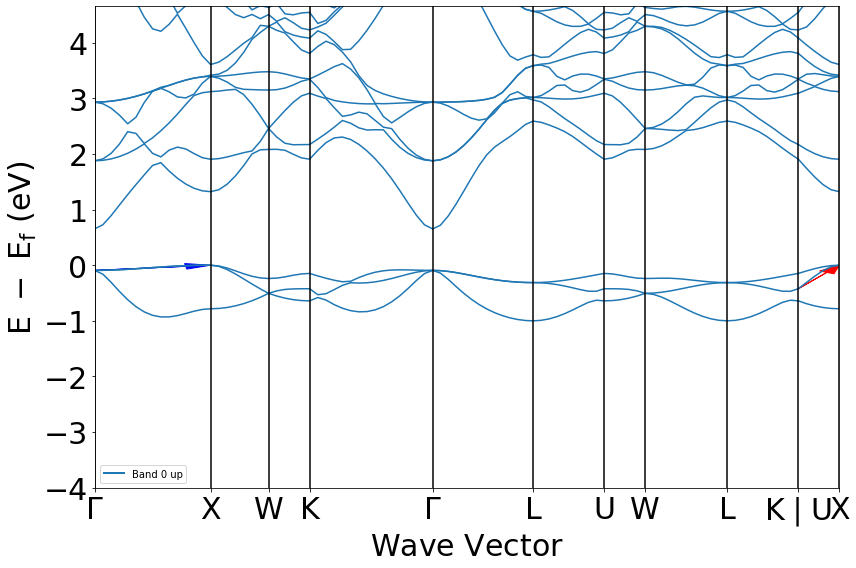

In [7]:
import matplotlib.pyplot as plt

BSPlotter(band).get_plot()
plt.arrow(x[9], (y.get('1')[9][14])[0], dx[9], dyValence[9], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][14])[0], dx[0], dyValence[0], color = 'b', head_width = 0.1,length_includes_head=True)
plt.show()

<h4>Masse effective au sommet</h4>

In [8]:
kpoint_val = band.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))

hbar = 6.582119570e-16 # Hbar en eV !!
m_electron = 9.11e-31
m_vbm = (hbar**2 * (kpoint_vbm[0]**2 + kpoint_vbm[1]**2 + kpoint_vbm[2]**2))/(2*abs(E_vbm))
print(f'La masse effective au sommet de la dernière bande de valence = {m_vbm} kg.')

Pour la bande de valence, la valeur de la norme est 0.7071067811865476
La masse effective au sommet de la dernière bande de valence = 5.7508403148026e-32 kg.


<h1> Première bande de conduction <h1\>

<h4>Directions de dispersion</h4>

In [9]:
# CBM = Conduction Band Minimum
cbm = band.get_cbm()
E_cbm = cbm['energy'] # Energy of max point
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = {} eV'.format(E_cbm))
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k  en coordonnées cartésiennes =', kpoint_cbm)
print(cbm.get('band_index'))
print("C'est donc la bande 16 qui a la plus petite énergie de la bande de conduction")

Energie du minimum de la bande de conduction = 2.4636 eV
sur le graphe : E-Ef =  0.6525000000000001
Vecteur k  en coordonnées cartésiennes = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
C'est donc la bande 16 qui a la plus petite énergie de la bande de conduction


In [10]:
dx = np.zeros(10)
dyConduction = np.zeros(10)
mConduction = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]

for i in range(10):
    dyConduction[i] = y.get('1')[i][16][-1] - y.get('1')[i][16][0]

# Here we calculate the slope
for i in range (10):
    mConduction[i] = dyConduction[i]/dx[i] 
    
print(mConduction)


print("En valeur absolue:")
mxConduction = np.max(abs(mConduction))
print("La plus grande dispersion pour la bande de conduction: ", mxConduction)
mnConduction = np.min(abs(mConduction))
print("La plus faible dispersion pour la bande de conduction: ", mnConduction)

[ 0.96480605  2.19064333 -0.71464934 -1.70409059  3.22744946 -1.61273131
  0.71464934  1.03934162 -1.61273131 -2.38338817]
En valeur absolue:
La plus grande dispersion pour la bande de conduction:  3.22744945721795
La plus faible dispersion pour la bande de conduction:  0.7146493372423012


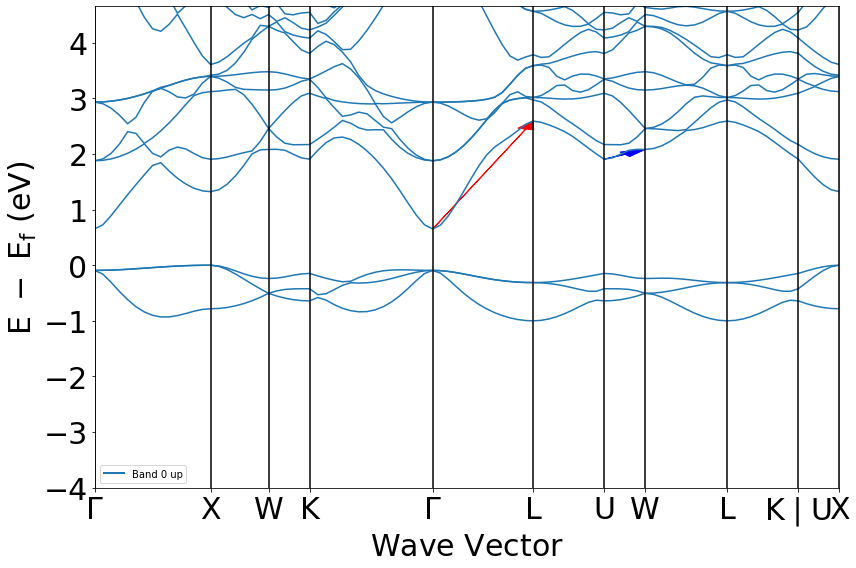

In [11]:
BSPlotter(band).get_plot()
plt.arrow(x[4], (y.get('1')[4][16])[0], dx[4], dyConduction[4], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[6], (y.get('1')[6][16])[0], dx[6], dyConduction[6], color = 'b', head_width = 0.1,length_includes_head=True)

plt.show()

<h4>Masse effective au sommet</h4>

In [12]:
kpoint_val = band.get_cbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_val))

hbar = 6.582119570e-16 # Hbar en eV !!
m_electron = 9.11e-31
m_cbm = (hbar**2 * (kpoint_cbm[0]**2 + kpoint_cbm[1]**2 + kpoint_cbm[2]**2))/(2*abs(E_cbm))
print(f'La masse effective au sommet de première bande de conduction = {m_cbm} kg.')

Pour la bande de conduction, la valeur de la norme est 0.0
La masse effective au sommet de première bande de conduction = 0.0 kg.


<h1>Graphiques Superposés</h1>

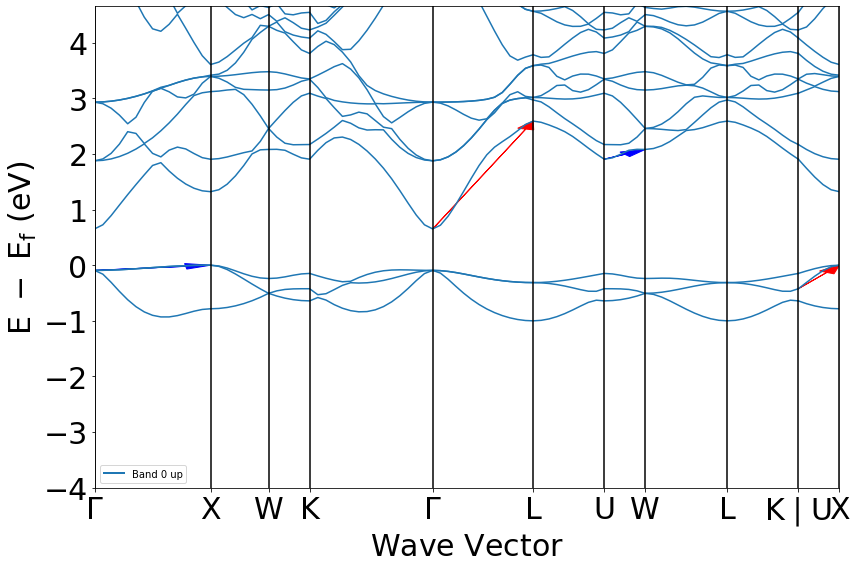

In [13]:
BSPlotter(band).get_plot()
plt.arrow(x[4], (y.get('1')[4][16])[0], dx[4], dyConduction[4], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[6], (y.get('1')[6][16])[0], dx[6], dyConduction[6], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[9], (y.get('1')[9][14])[0], dx[9], dyValence[9], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][14])[0], dx[0], dyValence[0], color = 'b', head_width = 0.1,length_includes_head=True)

plt.show()

<h4>Notes complémentaires</h4>
En approximant une dispersion parabolique, on calcule la masse effective comme ça:
$$E(k)=\frac{\hbar^2}{2m^*}(k_x^2+k_y^2+k_z^2) \Longrightarrow m^*=\frac{\hbar^2}{2*E(k)}(k_x^2+k_y^2+k_z^2)$$